In [26]:
print("Analyse Bourse")


Analyse Bourse


# Let's go learning PYTHON !

In [27]:
# Ceci est un commentaire dans la cellule de code 
# Python est de la programmation OBJET. On définit des variables. 
name = "Corentin"

print(name)


Corentin


In [28]:
name
# si on appelle la variable alors on voit son type.

'Corentin'

In [29]:
# Pour les chiffres on a 
# LES ENTIERS NATURELS
age = 24
print(age)

24


In [30]:
# Pour les chiffres à virgule on parle de FLOATS
pi = 3.14159
pi

3.14159

In [31]:
name = 'Imen'
#Titouan c'est du texte == STRING

In [32]:
# Mais nous sommes humains, donc nous LISONS des PHRASES
# Dès lors, on utilise la fonction PRINT F, qui permet d'avoir un print plus proche de notre language
# Les variables y sont DYNAMIQUES

print(f'Hello, les boloss dont {name}')

Hello, les boloss dont Imen


In [33]:
is_cool = True
is_cool

True

# Présentation des DATA STRUCTURES


In [34]:
# Les LISTES se nomment list en anglais 
stocks = ["AAPL","GOOGL","MSFT","TSLA"]
stocks


['AAPL', 'GOOGL', 'MSFT', 'TSLA']

In [35]:
# On peut AJOUTER des inputs dans la liste via la fonction APPEND
stocks.append("AMZN")
stocks

['AAPL', 'GOOGL', 'MSFT', 'TSLA', 'AMZN']

In [36]:
# UN DICTIONNAIRE c'est mieux encore qu'une liste
# On parle de Clé-Valeur
prices = {
    "APPL":248.04,
    "GOOGLE":328.33,
    "TSLA":437.43
}
prices

{'APPL': 248.04, 'GOOGLE': 328.33, 'TSLA': 437.43}

# La clé du succès

In [37]:
# C'est le fait que python repose sur des PACKAGES
# Donc on gagne un temps fou à ne pas ré inventer la ROUE à chaque fois
#! pip install yfinance

In [38]:
! pip install yfinance


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [39]:
import yfinance as yf

In [40]:
! pip install matplotlib


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [41]:
# La structure d'un projet python 
# Une structure où on emporte tous les packages
# Comme ça on a une overview des dépendances 

In [42]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [43]:
ticker = "AAPL"

In [44]:
# Pour prendre les données du packages yfinance on utilise
# Une FONCTION qui est def dans ce package pour EXTRAIRE la donnée
data = yf.download(ticker, start="2020-01-01",progress=False)

/usr/local/python/3.12.1/lib/python3.12/site-packages/yfinance/scrapers/history.py:144: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  end_dt = pd.Timestamp.utcnow().tz_convert(tz)
/usr/local/python/3.12.1/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()


In [45]:
data

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.400520,72.460784,71.156682,71.409785,135480400
2020-01-03,71.696632,72.455950,71.472454,71.629138,146322800
2020-01-06,72.267929,72.306499,70.568503,70.819201,118387200
2020-01-07,71.928047,72.533087,71.708687,72.277571,108872000
2020-01-08,73.085075,73.386393,71.631522,71.631522,132079200
...,...,...,...,...,...
2026-02-05,275.652069,279.238709,272.974582,277.869995,52977400
2026-02-06,277.859985,280.647386,276.671095,276.860920,50453400


In [46]:
data.head() # fonction pour voir les 5 premières lignes du dataset
data.tail() # fonction pour voir les 5 dernières lignes du dataset

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2026-02-05,275.652069,279.238709,272.974582,277.869995,52977400
2026-02-06,277.859985,280.647386,276.671095,276.860920,50453400
2026-02-09,274.619995,278.200012,271.700012,277.910004,44623400
2026-02-10,273.679993,275.369995,272.940002,274.890015,34341400
2026-02-11,279.190002,279.904999,274.450012,274.695007,17637194


In [47]:
#packages intéressant : yfinance; pypfopt ; empyrical ; risk-kit

In [48]:
print(data.columns)

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [49]:
#1. Télécharger les données (depuis 2020)
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", auto_adjust=False)

#2 Calculer les rendements journaliers (Daily returns)
# On utilise le "Adj Close" (prix ajusté aux dividendes/splits)
data ['Returns']= data['Adj Close'].pct_change()

#3. Calculer la volatilité et le rendement moyen (Annualisés)
# Il y a neviron 252 jours de trading par an 
mean_return_daily = data['Returns'].mean()
volatility_daily = data ['Returns'].std()
annualized_return = mean_return_daily * 252
annualized_volatility = volatility_daily*np.sqrt(252)

#4. Calcul du ratio de Sharpe (supposons un taux sans risque de 0)
sharpe_ratio = annualized_return / annualized_volatility

print(f"---Analyse pour {ticker}---")
print(f"Rendement annualisé: {annualized_return:.2%}")
print(f"volatilité annualisée: {annualized_volatility:.2%}")
print(f"Ratio de Sharpe:{sharpe_ratio:2f}")

/usr/local/python/3.12.1/lib/python3.12/site-packages/yfinance/scrapers/history.py:144: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  end_dt = pd.Timestamp.utcnow().tz_convert(tz)
/usr/local/python/3.12.1/lib/python3.12/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
[*********************100%***********************]  1 of 1 completed

---Analyse pour AAPL---
Rendement annualisé: 27.17%
volatilité annualisée: 31.68%
Ratio de Sharpe:0.857606


Text(0.5, 0, 'Date')

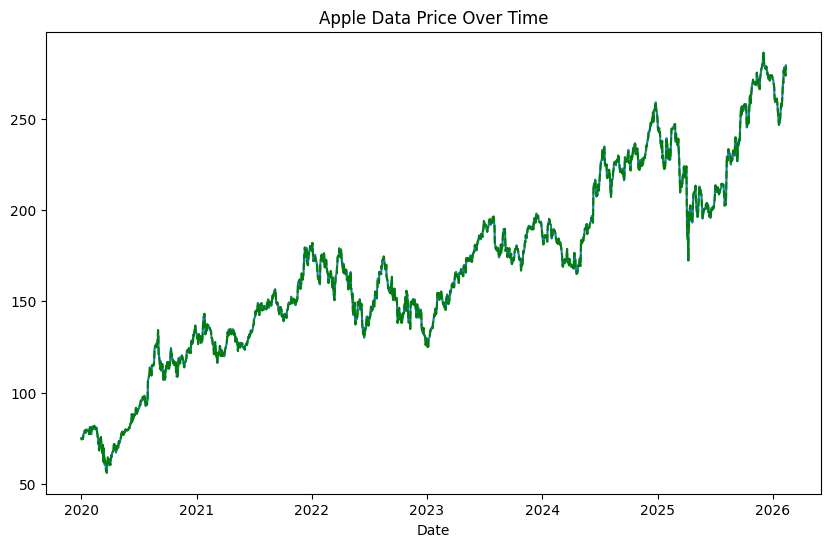

In [50]:
plt.figure (figsize=(10,6))
plt.plot (data['Close'], label='AAPL Closing Price')
plt.title ('Apple Data Price Over Time')
plt.plot(data['Close'],'g--')
plt.xlabel ('Date')